# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du [Cours TAL](https://cyberlearn.hes-so.ch/course/view.php?id=14966) est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3.7 ou 3.8](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais (1b et 1c), puis en français (1d).

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Pour utiliser NLTK en Python (y compris dans un _notebook_ Jupyter), vous pouvez écrire `import nltk`, puis accéder à toutes les commandes avec le préfixe `nltk.`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements qui peut être invoqué depuis un interpréteur Python en ligne de commande (écrire `python3` en ligne de commande) avec les deux commandes `import nltk` puis `nltk.download()`.  Cela vous permettra de télécharger de nombreux corpus _additionnels_ (i.e. collections de textes), mais que nous n'utiliserons pas en laboratoire.

In [1]:
import nltk
import random
import os
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Écrivez une phrase en anglais (liste de mots / string) que vous appelerez `sentence1`.  

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, trier les bi-grammes par ordre alphabétique et afficher le résultat.

In [2]:
sentence1 = "The cat is walking in the bedroom."
sentence1 = sentence1.lower()

print(f"The length of the sentence is {len(sentence1)} characters.")

words1 = nltk.word_tokenize(sentence1)

bigrams = list(nltk.bigrams(words1))

sorted(bigrams, key=lambda x: x[0])

The length of the sentence is 34 characters.


[('bedroom', '.'),
 ('cat', 'is'),
 ('in', 'the'),
 ('is', 'walking'),
 ('the', 'cat'),
 ('the', 'bedroom'),
 ('walking', 'in')]

Défnissez une chaîne appelée `string2` contenant une phrase.  Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [3]:
string2 = "The dog is running in the kitchen."
string2 = string2.lower()

print(f"The length of the sentence is {len(string2)} characters.")

words2 = nltk.word_tokenize(string2)

words2

The length of the sentence is 34 characters.


['the', 'dog', 'is', 'running', 'in', 'the', 'kitchen', '.']

## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stocker le contenu dans une chaîne.

In [4]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
type(raw)

str

En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder le texte principal.  Vous pouvez utiliser la notation dite de *slicing* en Python, ou identifier les chaînes où commence et finit le véritable texte.  Quelle est la longueur de ce texte en caractères ?  (Lien utile : [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).)

In [5]:
# Please write your Python code below and execute it.
start = '*** START OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***'
end = '*** END OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***'
startIndex = raw.index(start)+len(start)
endIndex = raw.index(end)
raw = raw[startIndex:endIndex]


In [6]:
print(f"La longueur du texte est de {len(raw)} characters.")

La longueur du texte est de 1157170 characters.


Vous allez maintenant segmenter le texte en phrases et les écrire dans un fichier avec une phrase par ligne.  Vous allez également segmenter chaque phrase en _tokens_ (mots et ponctuations), et créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  Vous aurez besoin des fonctions suivantes de nltk:
* `nltk.sent_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (notez que le nom "sentence tokenize" n'est pas très logique)
* `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**Segmentez le texte en phrases avec NLTK.** Affichez le nombre de phrases obtenues, et un court extrait de 5-6 phrases.  Comment appréciez-vous la qualité de la segmentation ?  *Note :* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`.

In [7]:
# Get rid of the carriage returns and new lines
raw = raw.replace("\r", "").replace("\n", " ")

# Split the text into sentences
sentences = nltk.sent_tokenize(raw, language='english')

index = random.randint(0, len(sentences)-5)
print(f"Le texte contient {len(sentences)} phrases.")

print("Voici 5 phrases aléatoires du texte:")
for i in range(5):
    print(sentences[index+i])


Le texte contient 11942 phrases.
Voici 5 phrases aléatoires du texte:
“What?” asked Pyotr Petrovitch, not catching his words; but he received no reply.
“That’s all true,” Zossimov hastened to interpose.
“Isn’t it so?” Pyotr Petrovitch went on, glancing affably at Zossimov.
“You must admit,” he went on, addressing Razumihin with a shade of triumph and superciliousness--he almost added “young man”--“that there is an advance, or, as they say now, progress in the name of science and economic truth...”  “A commonplace.”  “No, not a commonplace!
Hitherto, for instance, if I were told, ‘love thy neighbour,’ what came of it?” Pyotr Petrovitch went on, perhaps with excessive haste.


Lorsqu'il y a des phrases qui ne se termine pas avec de la ponctuation, le tokenizer va considérer que c'est la même phrase. Nous avons également décidé de remplacer tous les `\r` par une chaîne vide et les `\n` par un espace.

Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [8]:
filename1 = "sample_text_1.txt"
if os.path.exists(filename1):
    os.remove(filename1)
fd = open(filename1, 'a', encoding='utf8')

# Store the sentences in a file
for s in sentences:
    fd.write(s + '\n')

fd.close()

**Segmentez maintenant chaque phrase en tokens (mots et ponctuations).**  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez quelques phrases et commentez la qualité de la tokenisation.

In [9]:
# Store tokens in a list
tokens = [nltk.word_tokenize(s) for s in sentences]

index = random.randint(0, len(sentences) - 5)
print(f"Le texte contient {len(sentences)} phrases.")

print("Voici 5 phrases aléatoires du texte:")
for i in range(5):
    print(" ".join(tokens[index + i]))


Le texte contient 11942 phrases.
Voici 5 phrases aléatoires du texte:
Why am I hesitating ?
As I came down the stairs yesterday , I said myself that it was base , loathsome , vile , vile ... the very thought of it made me feel sick and filled me with horror .
“ No , I couldn ’ t do it , I couldn ’ t do it !
Granted , granted that there is no flaw in all that reasoning , that all that I have concluded this last month is clear as day , true as arithmetic .... My God !
Anyway I couldn ’ t bring myself to it !


On remarque que la qualité est bien meilleure car elle est granulaire. On peut donc traiter le texte de manière plus fine.

Calculez le nombre total de _tokens_ obtenus.

In [10]:
# Please write your Python code in this cell and execute it.
print(f"Le texte contient {sum(len(sentence)for sentence in tokens)} tokens.")

Le texte contient 253647 tokens.


Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne et en insérant un espace entre chaque _token_.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [11]:
filename2 = "sample_text_2.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt
if os.path.exists(filename2): 
    os.remove(filename2)
    
# Store the tokens in a file
fd = open(filename2, 'a', encoding='utf8')

for sentence in tokens:
    s = ""
    for token in sentence:
        s += token + " "
    fd.write(s + '\n')
        
fd.close()


Il est également possible de *tokeniser un texte sans le segmenter préalablement en phrases*.
* Effectuez cette opération directement sur la chaîne de caractères contenant tout le texte.  
* Affichez et observez un court extrait. 
* Demandez le nombre total de tokens et comparez-le avec le nombre précédent.  
* Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [13]:
# Please write your Python code in this cell and execute it.
tokenized_text = nltk.word_tokenize(raw)

index = random.randint(0, len(tokenized_text) - 5)
print(tokenized_text[index:index+5])
print(len(tokenized_text))

['am', 'showing', 'off', 'to', 'myself']
253647


On observe qu'il y a le même nombre de tokens dans les deux solutions.

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  Ces objets peuvent être créés avec : 
1. la chaîne de caractères constituant le texte
2. la liste de tous les mots du texte (chaînes)
3. la liste de toutes les phrases (liste de listes)

**Attention:**

* seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`
* les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`

Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  (Vous pouvez appeler ici `nltk.word_tokenize`.)

In [24]:
# Please write your Python code in this cell and execute it.
tokens = nltk.word_tokenize(raw)
text = nltk.Text(tokens)

Le [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) montre des exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.  Par exemple, on peut afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`, ou trouver des mots qui ont des contextes semblables à un mot donné avec `similar`.  Veuillez expérimenter ci-dessous avec ces deux méthodes et afficher un résultat à chaque fois.

In [51]:
# Please write your Python code in this cell and execute it.
print("Concordance: ")
text.concordance("heart", lines=10)


Concordance: 
Displaying 10 of 130 matches:
 us as wisdom ... that wisdom of the heart which we seek that we may learn from
d in these streets and alleys in the heart of Petersburg , types so various wer
ss and contempt in the young man ’ s heart , that , in spite of all the fastidi
re and more violent . With a sinking heart and a nervous tremor , he went up to
into my head ? What filthy things my heart is capable of . Yes , filthy above a
had begun to oppress and torture his heart while he was on his way to the old w
hy am I not at my duty ? Does not my heart ache to think what a useless worm I 
drel , but she is a woman of a noble heart , full of sentiments , refined by ed
give , I know it ... I felt it in my heart when I was with her just now ! And H
 Let her strike me , it relieves her heart ... it ’ s better so ... There is th


In [53]:
print("Similar: ")
text.similar("citizen", num=10)

Similar: 
man word smile moment pig and help room position student


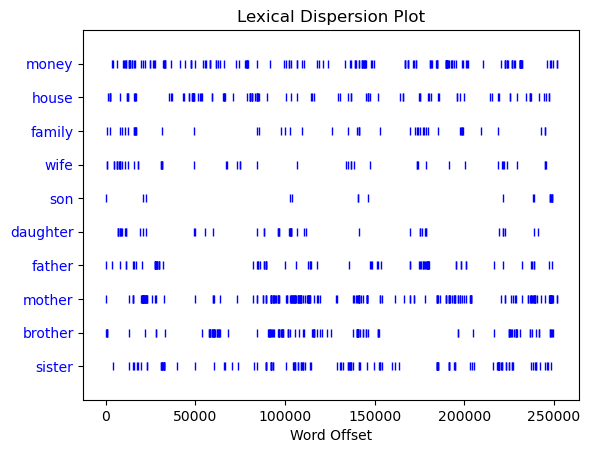

In [38]:
# Please write your Python code in this cell and execute it.


En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations les plus fréquentes dans votre texte.

In [55]:
text.collocation_list(num=10)

[('Katerina', 'Ivanovna'),
 ('Pyotr', 'Petrovitch'),
 ('Pulcheria', 'Alexandrovna'),
 ('Avdotya', 'Romanovna'),
 ('Rodion', 'Romanovitch'),
 ('Marfa', 'Petrovna'),
 ('Sofya', 'Semyonovna'),
 ('old', 'woman'),
 ('Porfiry', 'Petrovitch'),
 ('Amalia', 'Ivanovna')]

On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste des _types_) simplement en convertissant la liste des mots (occurrences ou _tokens_) à un `set` en Python.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [61]:
# Please write your Python code in this cell and execute it.
vocabulary = sorted(set(text))
print(f"Le texte contient {len(vocabulary)} mots uniques.")

# words with more than 15 characters
count = len(list(filter(lambda w: len(w) > 15, vocabulary)))
print(f"Le texte contient {count} mots avec plus de 15 caractères.")


Le texte contient 11096 mots uniques.
Le texte contient 30 mots avec plus de 15 caractères.


**Distributions de fréquence (Frequency Distributions)**

NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text`.  Le résultat est stocké dans un objet de type `FreqDist` (pour _frequency distribution_) comme montré dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de là, on peut déterminer les mots les plus fréquents.

Veuillez construire la distribution de fréquences de votre texte.

In [19]:
# Please write your Python code in this cell and execute it.


Affichez les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

In [20]:
# Please write your Python code in this cell and execute it.


## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

Nous allons utiliser les fonctions graphiques de NLTK, mais il est possible de générer directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

In [21]:
import matplotlib.pyplot
%matplotlib inline

Affichez le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

In [22]:
# Please write your Python code in this cell and execute it.
text.dispersion_plot(["money", "house", "family", "wife", "son", "daughter", "father", "mother", "brother", "sister"])

Maintenant, construisez une liste avec la longueur de chaque _token_ du texte (la liste aura donc autant de nombres que de tokens).  Créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (cette fois-ci _non_-cumulative) des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

In [23]:
# Please write your Python code in this cell and execute it.


## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1c et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 